In [2]:
import utilities as ut
import construction as cs
import singleDatasetAnalysis as san
import multipleDatasetAnalysis as man
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%load_ext autoreload
%autoreload 2


from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# avg Node degree time all datasets

NAME :  InVS13.dat
394247
DIPARTMENTS:  ['DISQ' 'DMCT' 'DSE' 'SFLE' 'SRH']
# of graphs 89
# of nodes 95


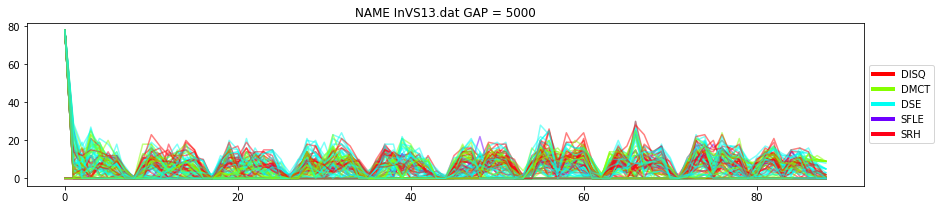

NAME :  InVS15.dat
1283194
DIPARTMENTS:  ['DCAR' 'DG' 'DISQ' 'DMCT' 'DMI' 'DSE' 'DST' 'SCOM' 'SDOC' 'SFLE' 'SRH'
 'SSI']
# of graphs 90
# of nodes 219


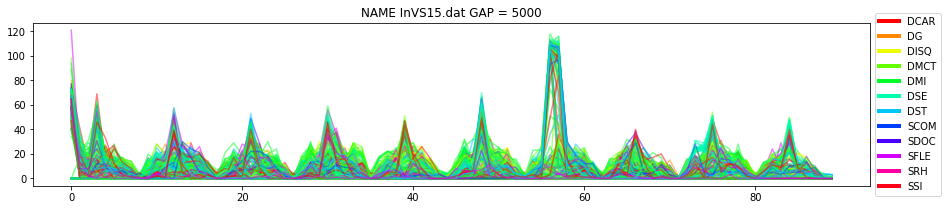

NAME :  LH10.dat
150126
DIPARTMENTS:  ['Admin' 'Etude' 'Med' 'Paramed' 'Patient']
# of graphs 52
# of nodes 73


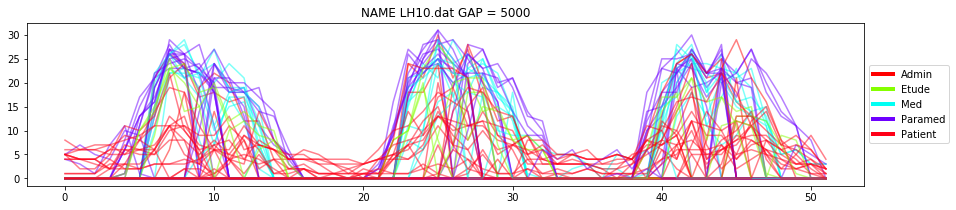

NAME :  Thiers13.dat
18613039
DIPARTMENTS:  ['2BIO1' '2BIO2' '2BIO3' 'MP' 'MPst1' 'MPst2' 'PC' 'PCst' 'PSIst']
# of graphs 39
# of nodes 328


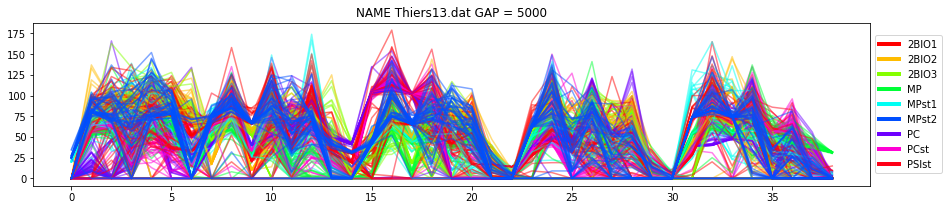

NAME :  LyonSchool.dat
6594492
DIPARTMENTS:  ['ce1a' 'ce1b' 'ce2a' 'ce2b' 'cm1a' 'cm1b' 'cm2a' 'cm2b' 'cpa' 'cpb'
 'teachers']
# of graphs 14
# of nodes 242


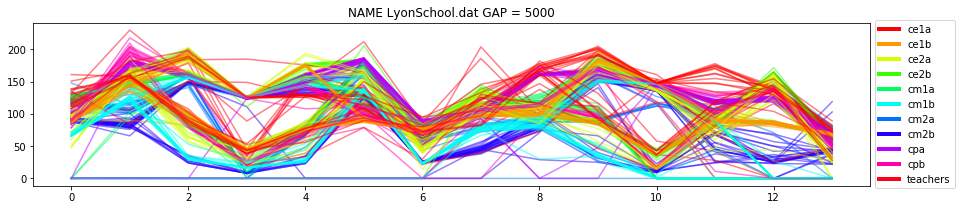

In [16]:
names = ["InVS13.dat", "InVS15.dat", "LH10.dat", "Thiers13.dat","LyonSchool.dat"]
path_data = "data/co-presence/"
path_meta = "data/co-presence/metadata/metadata_"

for name in names:
    print("NAME : ",name)
    data_in = cs.load_data(path_data+name)
    meta = path_meta+name
    print(len(data_in))
    
    # compute colors
    meta_dict = load_metadata(meta)
    dict_colors = compute_colors(meta_dict)
    data = data_in
    gap = 5000
    dict_degrees = node_degrees_times(data,gap=gap)
    plot_node_behaviour(dict_degrees,
                        meta_dict,
                        dict_colors,
                        title = "NAME "+str(name)+" GAP = "+str(gap),
                        figsize=(15,3),
                        alpha=0.5,
                        save=None)

In [4]:
from matplotlib.lines import Line2D



def plot_node_behaviour_unique_department(dictionary,meta_dict,dict_colors,figsize=(15,3),alpha=0.5,save=None):
    departmens = np.unique(list(meta_dict.values()))
    
    plt.figure(figsize=(15,3*len(departmens)))
    j = 1
    for dip in departmens:
        plt.subplot(len(departmens),1,j)
        j = j + 1
        keys = list(dictionary.keys())
        
        for i in keys:
            degrees = dictionary[i]
            if (meta_dict[i]==dip):
                plt.plot((degrees))
        plt.title("Department: "+dip)
        
    
    plt.subplots_adjust(hspace=0.3)
    if (save):
        name = "results/"+save+"_"+dip+".pdf"
        plt.savefig(name)
    plt.show()

def plot_node_behaviour(dictionary,meta_dict,dict_colors,figsize=(15,3),title=None,alpha=0.5,save=None):
    keys = list(dictionary.keys())
    plt.figure(figsize=figsize)
    for i in keys:
        degrees = dictionary[i]
        plt.plot((degrees),alpha=alpha,color = dict_colors[meta_dict[i]])

    # build legend
    custom_legend = []
    custom_departmenst = []
    for i in np.unique(list(meta_dict.values())):
        custom_departmenst.append(i)
        custom_legend.append(Line2D([0], [0], color=dict_colors[i], lw=4))

    plt.legend(custom_legend, np.unique(list(meta_dict.values())),loc='center left', bbox_to_anchor=(1, 0.5))
    if (save):
        name = str(save)+".pdf"
        plt.savefig(name)
    if (title):
        plt.title(title)
    plt.show()

    
    
    
    
def plot_node_behaviour_avg(dictionary,meta_dict,dict_colors,figsize=(15,3),alpha=0.5,save=None):
    keys = list(dictionary.keys())
    plt.figure(figsize=(15,3))
    for i in keys:
        degrees = dictionary[i]
        plt.plot((degrees),alpha=1,color = dict_colors[i])

    # build legend
    custom_legend = []
    custom_departmenst = []
    for i in np.unique(list(meta_dict.values())):
        custom_departmenst.append(i)
        custom_legend.append(Line2D([0], [0], color=dict_colors[i], lw=4))

    plt.legend(custom_legend, np.unique(list(meta_dict.values())),loc='center left', bbox_to_anchor=(1, 0.5))
    if (save):
        name = str(save)+".pdf"
        plt.savefig(name)
    plt.show()

#### compute the average of a dictionary 
def departments_average(dictionary,meta_dict):
    departments = np.unique(list(meta_dict.values()))

    # initialize average clique dictionary
    dict_avg = dict()
    for i in departments:
        dict_avg[i] = []

    # crate dict avg
    # dict_avg {Dipartmend : [[(Node1) t1,t2,t3..][(Node1) t1,t2,t3..]...]...}
    for i in dictionary: 
        dict_avg[meta_dict[i]].append(dictionary[i])
        
    # comute the average
    for i in departments:
        tmp = dict_avg[i]
        dict_avg[i] = np.mean(tmp,0)
    
    return(dict_avg)

In [5]:
def node_degrees_times(data,gap):
    '''
    Input: loaded file, and GAP
    Output: dict_degree a dictionary {node_id : [degree t0,degree t1, degree_t2 ..]....}
    '''

    graphs, pos = cs.build_graphs(data,gap)
    print("# of graphs",len(graphs))

    nodes = cs.individuals(data)
    print("# of nodes",len(nodes))
    dict_degrees = dict() # inizialize dictionary {node_id : []}
    for n in nodes:
        dict_degrees[n] = []

    # fill dictionary
    for g in graphs:
        for n in g.nodes():
            degree = nx.degree(g,n)
            dict_degrees[n].append(degree)
        
    return(dict_degrees)

In [6]:
def load_metadata(path):
    '''
    Input METADATA PATH
    Output dictionary {node_ID : "Dipartment",...}
    '''
    fp = open(path, 'r')
    meta_dict = dict()
    for line in fp.readlines():
        meta_dict[int(line.split("\t")[0])] = line.split("\t")[1][0:-1]

    fp.close()  
    print("DIPARTMENTS: ",np.unique(list(meta_dict.values())))
    return(meta_dict)

def compute_colors(meta_dict):
    '''
    Input metadata dictionary {node_ID : "Dipartment",...}
    Output colors dictionary {"Dipartment": "color"}
    '''
    departments = np.unique(list(meta_dict.values()))
    colors = get_cmap(len(departments))
    dict_colors = dict()
    for i in range(len(departments)):
        dict_colors[departments[i]] = colors(i)
        
        
    return(dict_colors)


def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
